In [1]:
import pandas as pd
import numpy as np

Проведём загрузку данных

In [85]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Из характеристики данных мы видим, что пол клиентов является категориальным признаком и целесообразно провести их кодирование. На самом деле, на мой взгляд, данный признак не будет сильно влиять на результат кластеризации, однако для получения практики всё же произведём эту процедуру

In [86]:
from sklearn import preprocessing

def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_df, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [87]:
encoders

{'Genre': LabelEncoder()}

In [88]:
df.groupby('Genre').count()[['CustomerID']]

,CustomerID
Genre,
Female,112
Male,88


In [89]:
encoded_df.groupby('Genre').count()[['CustomerID']]

,CustomerID
Genre,
0,112
1,88


Теперь видно, что клиенты мужского пола соответствуют цифре 1, женского - 0.
Проведём изучение данных и их подготовку

In [90]:
encoded_df.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [91]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E9039C748>,
      dtype=object)

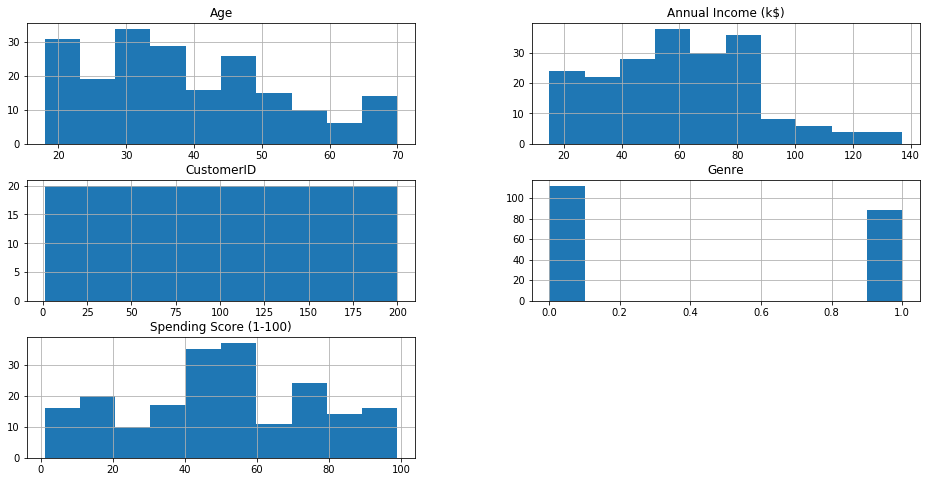

In [92]:
encoded_df.hist(figsize=(16,8))

В целом, данные являются однородными и без явных пропусков и отклонений. Нам же будут в первую очередь интересны возраст, годовой доход и присвоенный счётчик. Их мы и будем использовать в кластеризации

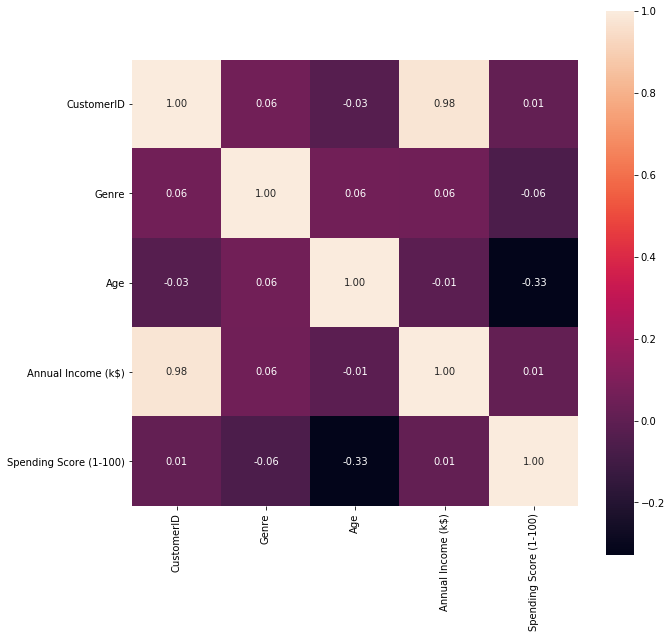

In [93]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

plt.subplots(figsize=(10,10))
encoded_df, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True, fmt='.2f')
plt.show()

Чёткой корелляции между признаками не прослеживается.
Как и указывалось выше, возьмём только три признака для целей кластеризации: возраст, годовой доход и присвоенный счётчик

In [128]:
X=encoded_df.iloc[:, [2,3,4]].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

Применим метод K-means.
Для первого результата возьмём количчество кластеров равным 3, остальные параметры будут равными или близкими к умолчательным

In [156]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

km = KMeans(n_clusters = 3,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = None,
                algorithm = 'auto',
                tol = 0.001)
    
km.fit(X)
labels = km.labels_

y_means = km.fit_predict(X)

Попробуем визуализировать результат в 2D и 3D-плоскости

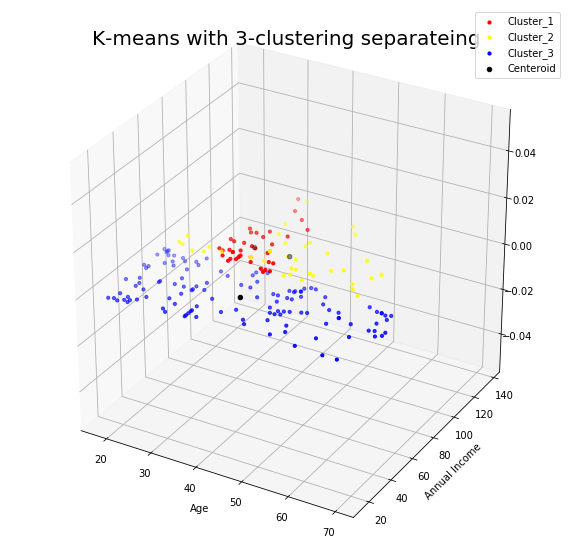

In [157]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 10, c = 'red', label = 'Cluster_1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 10, c = 'yellow', label = 'Cluster_2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 10, c = 'blue', label = 'Cluster_3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 20, c = 'black' , label = 'Centeroid')


plt.title('K-means with 3-clustering separateing', fontsize = 20)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

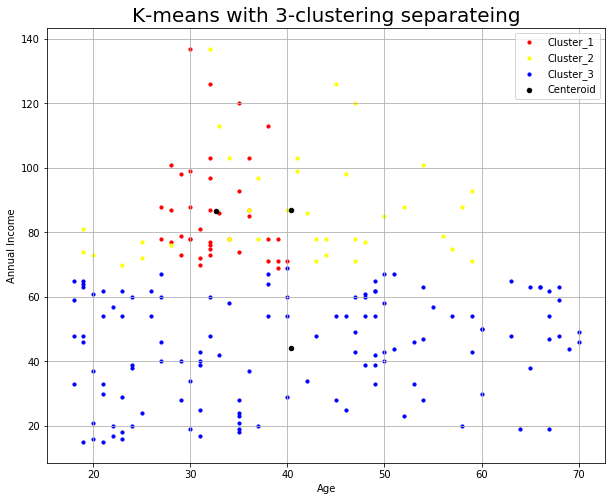

In [158]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 10, c = 'red', label = 'Cluster_1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 10, c = 'yellow', label = 'Cluster_2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 10, c = 'blue', label = 'Cluster_3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 20, c = 'black' , label = 'Centeroid')
plt.title('K-means with 3-clustering separateing', fontsize = 20)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

Очевидно, что три кластера будет недостаточным для описания наших данных, поэтому попробуем найти оптимальное количество кластеров

C:\Users\shmel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


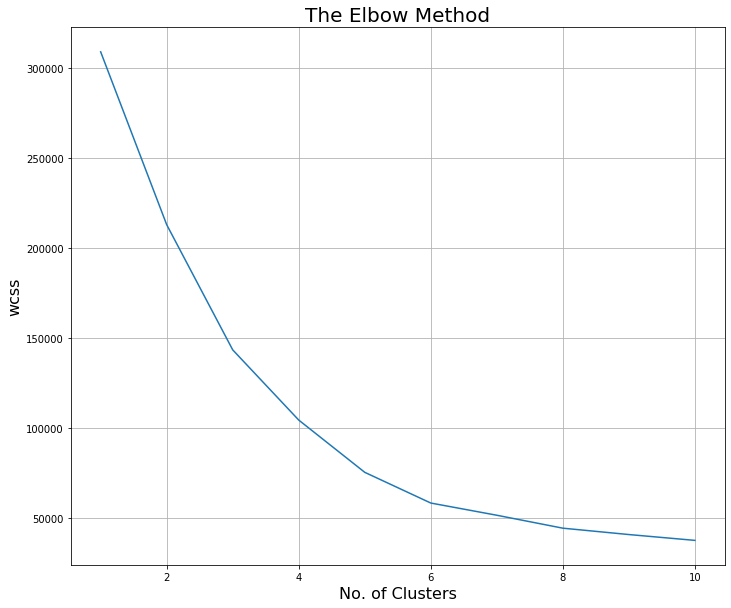

In [159]:
wcss = []
for i in range(1, 11):
        
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = None,
                algorithm = 'auto',
                tol = 0.001)   
    km.fit(X)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (10,8)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters', fontsize = 16)
plt.ylabel('wcss', fontsize = 16)
plt.show()

Из графика видно, что "перегиб" находится на количестве кластеров, равный 5.
Теперь попробуем найти значения центров этих пяти кластеров.

In [160]:
km = KMeans(n_clusters = 5,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = None,
                algorithm = 'auto',
                tol = 0.001)
    
km.fit(X)
labels = km.labels_

y_means = km.fit_predict(X)

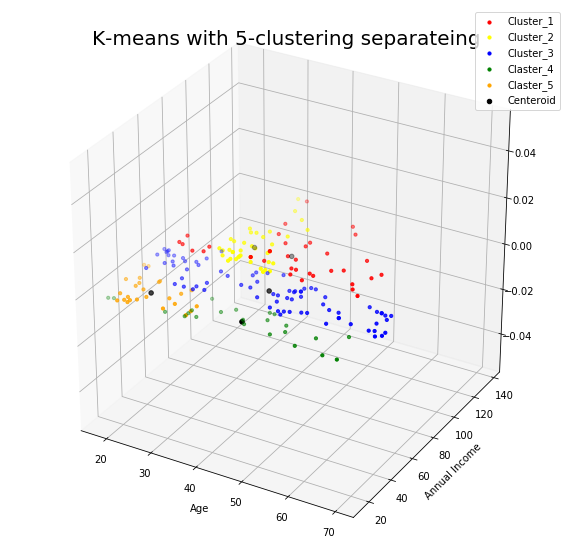

In [163]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 10, c = 'red', label = 'Cluster_1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 10, c = 'yellow', label = 'Cluster_2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 10, c = 'blue', label = 'Cluster_3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 10, c = 'green', label = 'Claster_4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 10, c = 'orange', label = 'Claster_5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 20, c = 'black' , label = 'Centeroid')


plt.title('K-means with 5-clustering separateing', fontsize = 20)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

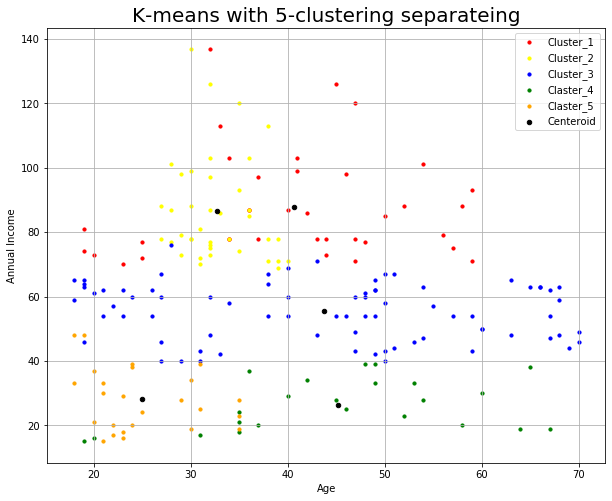

In [164]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 10, c = 'red', label = 'Cluster_1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 10, c = 'yellow', label = 'Cluster_2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 10, c = 'blue', label = 'Cluster_3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 10, c = 'green', label = 'Claster_4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 10, c = 'orange', label = 'Claster_5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 20, c = 'black' , label = 'Centeroid')
plt.title('K-means with 5-clustering separateing', fontsize = 20)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

Таким образом мы смогли разделить наши данные на 5 кластеров.
Посмотрим характеристики центров кластеров

In [166]:
km.cluster_centers_

array([[40.66666667, 87.75      , 17.58333333],
       [32.69230769, 86.53846154, 82.12820513],
       [43.72727273, 55.48051948, 49.32467532],
       [45.2173913 , 26.30434783, 20.91304348],
       [24.96      , 28.04      , 77.        ]])

Вывод:
Наших клиентов можно разделить на пять аудиторий (условно):
1 - "Успешные взрослые" (со средним возрастом 40,5 лет со среднегодовым доходом 87,8 тыс. долларов),
2 - "Успешная молодёжь" (со средним возрастом 32,7 лет со среднегодовым доходом 86,5 тыс. долларов),
3 - "Взрослые и молодежь среднего класса" (со средним возрастом 43,7 года со среднегодовым доходом 55.5 тыс. долларов),
4 - " Взрослые с низким доходом" (со средним возрастом 45,2 лет со среднегодовым доходом 26,3 тыс.долларов),
5 - "Молодёжь" (со средним возрастом 25 лет со среднегодовым доходом 28 тыс. долларов).
Причем, категории №№2 и 5 имеют более "собранную" структуру и более чёткие границы